## Craft a Story from a Dataset <br>
income datafrom Kaggle <br>
https://www.kaggle.com/wenruliu/adult-income-dataset

impoerting useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing data

In [2]:
data = pd.read_csv('adult 2.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


if you look at the 5th row in "occupation" you see a '?' which indicated a null value. we will take care of this before exploring

In [3]:
df = pd.DataFrame(data)

data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

this indicates no missing values however, we know there must be at least one given a '?' was seen. 

note: fnlwgt means 'final weight' its essentially this is the number of people the census believes the entry represents

In [6]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
df['native-country'].value_counts().head()

United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Name: native-country, dtype: int64

In [8]:
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [9]:
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
df.dropna(how='any',inplace=True)

In [11]:
double=df.duplicated().any()

In [12]:
print("returns 'True' if there are duplicates:", double)

returns 'True' if there are duplicates: True


In [13]:
df=df.drop_duplicates()

In [14]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,45175.000000,45175,4.517500e+04,45175,45175.000000,45175,45175,45175,45175,45175,45175.000000,45175.000000,45175.000000,45175,45175
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33262,NaN,14770,NaN,21042,6010,18653,38859,30495,NaN,NaN,NaN,41256,33973
mean,38.556170,NaN,1.897388e+05,NaN,10.119314,NaN,NaN,NaN,NaN,NaN,1102.576270,88.687593,40.942512,NaN,NaN
std,13.215349,NaN,1.056524e+05,NaN,2.551740,NaN,NaN,NaN,NaN,NaN,7510.249876,405.156611,12.007730,NaN,NaN
min,17.000000,NaN,1.349200e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.173925e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783120e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.379030e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


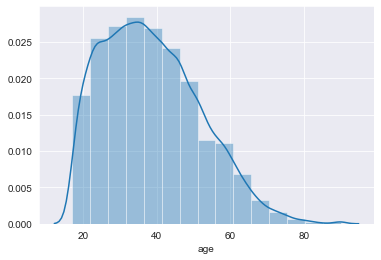

In [15]:
sns.set_style('darkgrid')
sns.distplot(df['age'] , bins = 15, kde = True) 

Age is clearly skewed and my need to be normalized if a predictive modle is to be made

In [16]:
df[df['workclass'] == '?'].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [17]:
rename = {'?':'Other'}
# '?' should be renamed for 'other' 
df['workclass'] = df['workclass'].replace(rename)
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

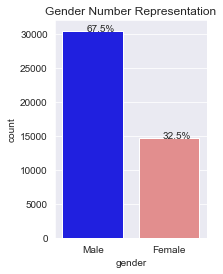

In [18]:
def precent_plot(df,col,ax):
    ax = sns.countplot(data=df, x=col,order=df[col].value_counts().index, palette = {'Male': 'blue', 'Female':'lightcoral'})
    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
            x = p.get_x() + p.get_width()*0.4
            y = p.get_y()  + p.get_height()
            ax.annotate(percentage, (x, y))
    plt.show()


fig = plt.figure()
ax_1 = fig.add_subplot(121)
plt.title('Gender Number Representation')
precent_plot(df,'gender',ax_1)

Gender is also skewed in this data set so the elder and women will be missrepresented. Given the skewed nature of the data set, persuing "male v.s. female" information would not yield accurate conclusions. Age however, can still be worked with given that many people over the age of 60 tend to be retired and have no income from a job

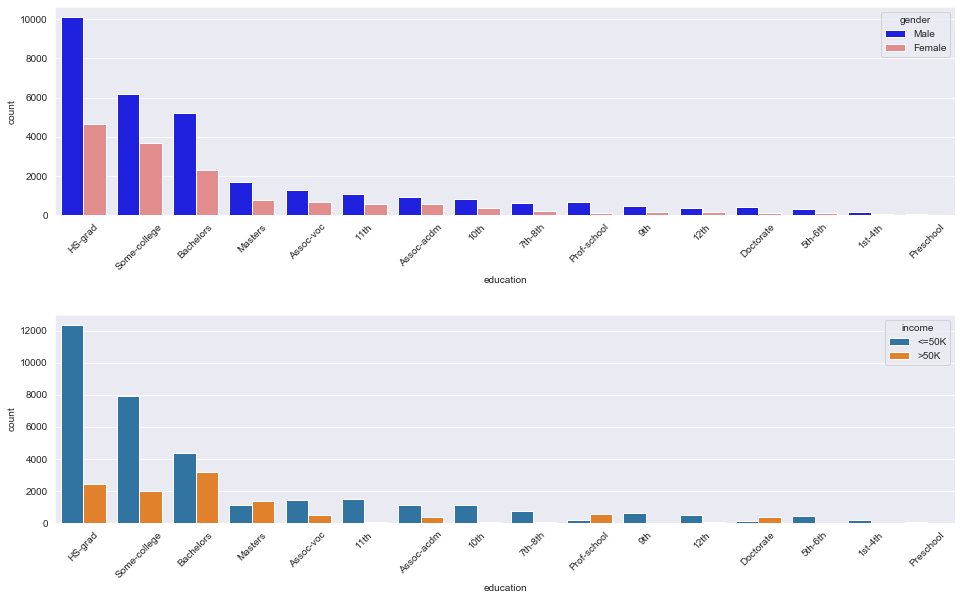

In [19]:
fig = plt.figure(figsize=(14,8))

ax_1 = fig.add_subplot(211)
sns.countplot(x='education',hue='gender',palette = {'Male': 'blue', 'Female':'lightcoral'},order=df['education'].value_counts().index,data=df,ax=ax_1)
plt.xticks(rotation=45)

fig.tight_layout(pad=3.0)

ax_2 = fig.add_subplot(212)
sns.countplot(x='education',hue='income',palette='tab10',
              order=df['education'].value_counts().index,data=df)
plt.xticks(rotation=45);

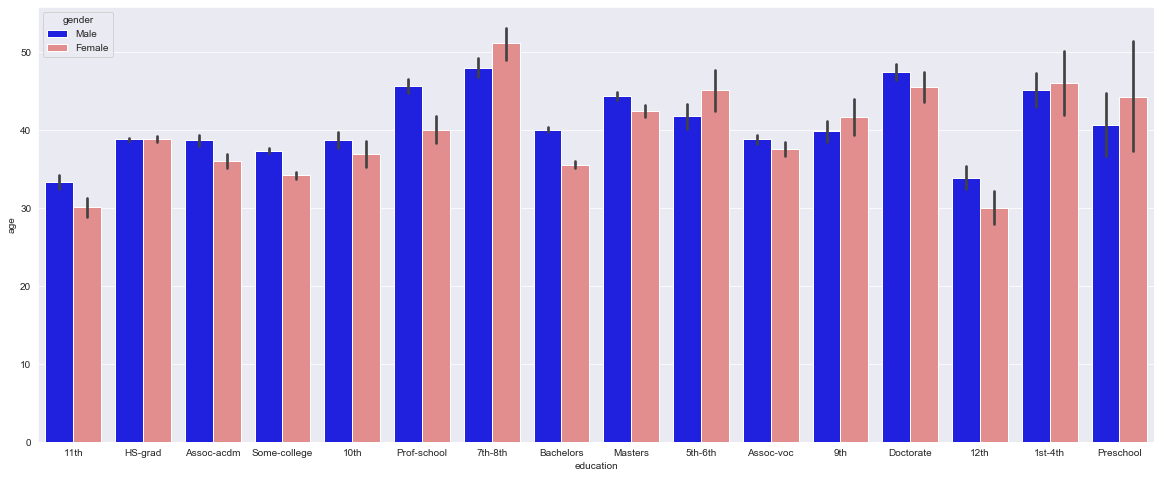

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(data = df, y = 'age', x = 'education', hue = 'gender', 
            palette = {'Male': 'blue', 'Female':'lightcoral'})

In [21]:
sum(df['age'].between(17,48))

34858

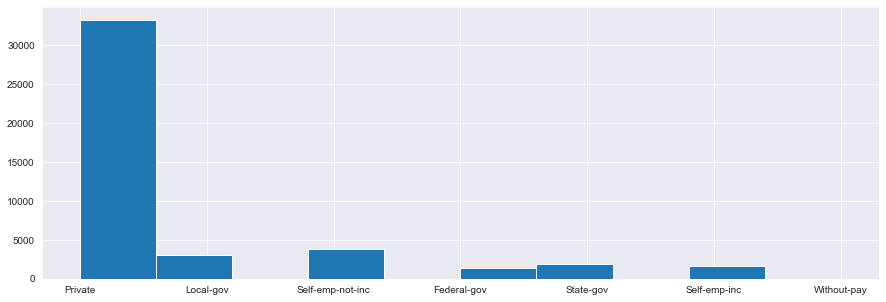

In [22]:
df['workclass'].hist(figsize=(15,5))

In [23]:


filter1=df['education']=='Bachelors'
filter2=df['education']=='Masters'



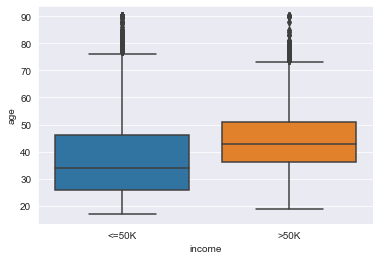

In [24]:
sns.boxplot(x='income',y='age',data=df)

In [25]:
df['income_flag']=df['income'].map({'<=50K':0,'>50K':1})

In [26]:
df.groupby('workclass')['income_flag'].mean().sort_values(ascending=False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income_flag, dtype: float64

In [27]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_flag
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


<Figure size 1080x576 with 0 Axes>

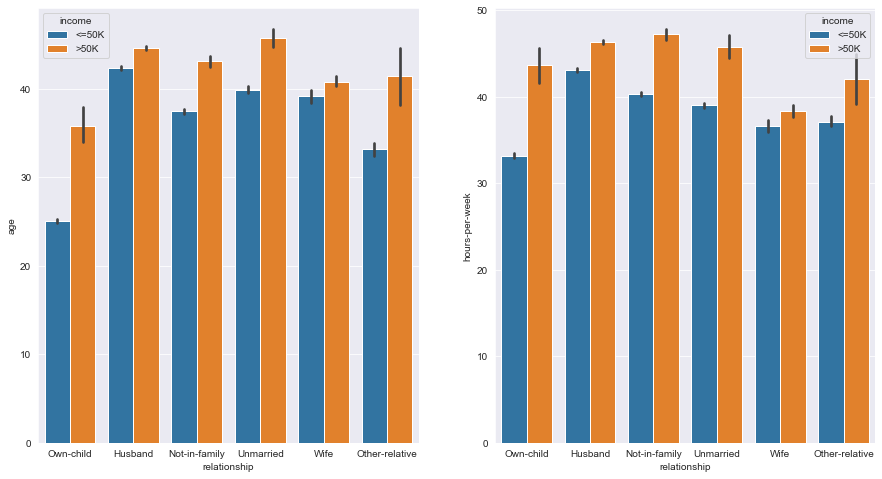

In [28]:
plt.figure(figsize=(15,8))
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
fig = sns.barplot(ax = axes[0], data = df, x = 'relationship', hue = 'income', y = 'age')
fig1 = sns.barplot(ax = axes[1],data = df, x = 'relationship', hue = 'income', y = 'hours-per-week')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45175 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45175 non-null  int64 
 1   workclass        45175 non-null  object
 2   fnlwgt           45175 non-null  int64 
 3   education        45175 non-null  object
 4   educational-num  45175 non-null  int64 
 5   marital-status   45175 non-null  object
 6   occupation       45175 non-null  object
 7   relationship     45175 non-null  object
 8   race             45175 non-null  object
 9   gender           45175 non-null  object
 10  capital-gain     45175 non-null  int64 
 11  capital-loss     45175 non-null  int64 
 12  hours-per-week   45175 non-null  int64 
 13  native-country   45175 non-null  object
 14  income           45175 non-null  object
 15  income_flag      45175 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 7.1+ MB


In [30]:
df['native-country'].value_counts()

United-States                 41256
Mexico                          895
Philippines                     282
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        84
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

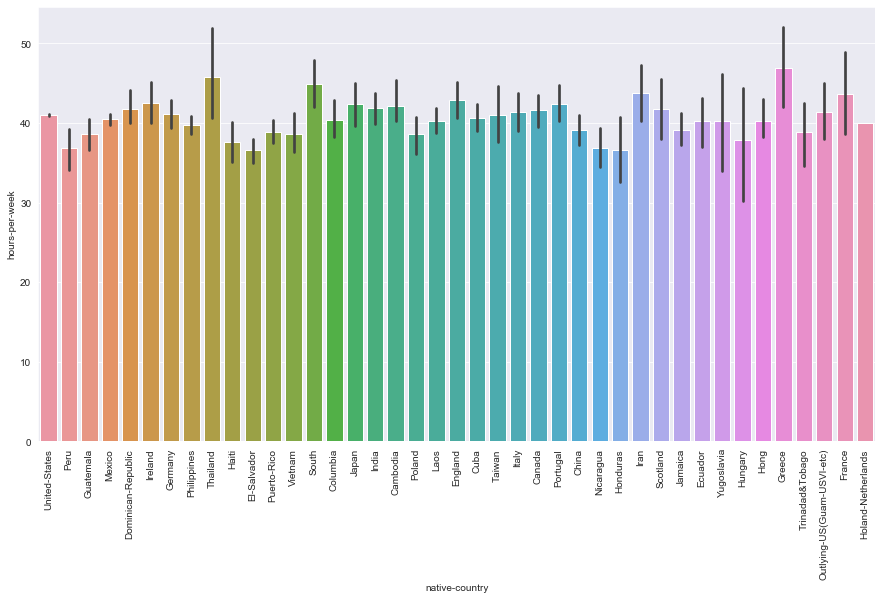

In [31]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data = df, x = 'native-country', y = 'hours-per-week')
plt.xticks(rotation=90)

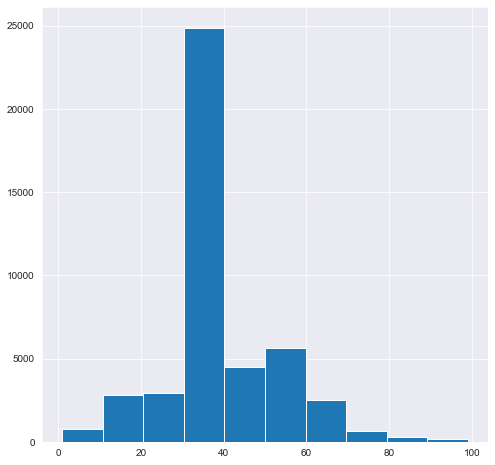

In [42]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

In [32]:
filter1=df['hours-per-week'] <= 40

In [39]:
df['OT']=df['hours-per-week'] >= 40

Text(0.5, 1.0, 'over time worked')

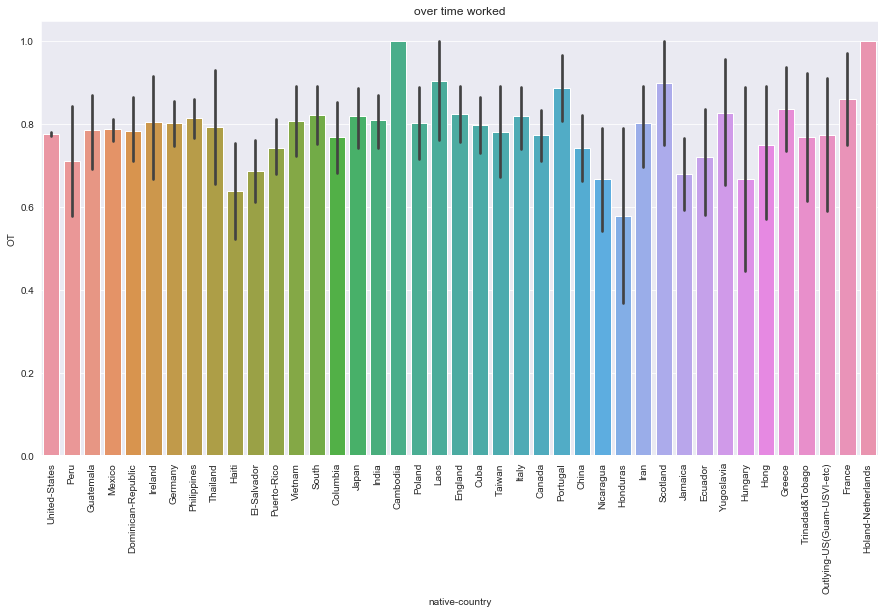

In [40]:
plt.figure(figsize=(15,8))
fig = sns.barplot(data = df, x = 'native-country', y = 'OT')
plt.xticks(rotation=90)
plt.title('over time worked')

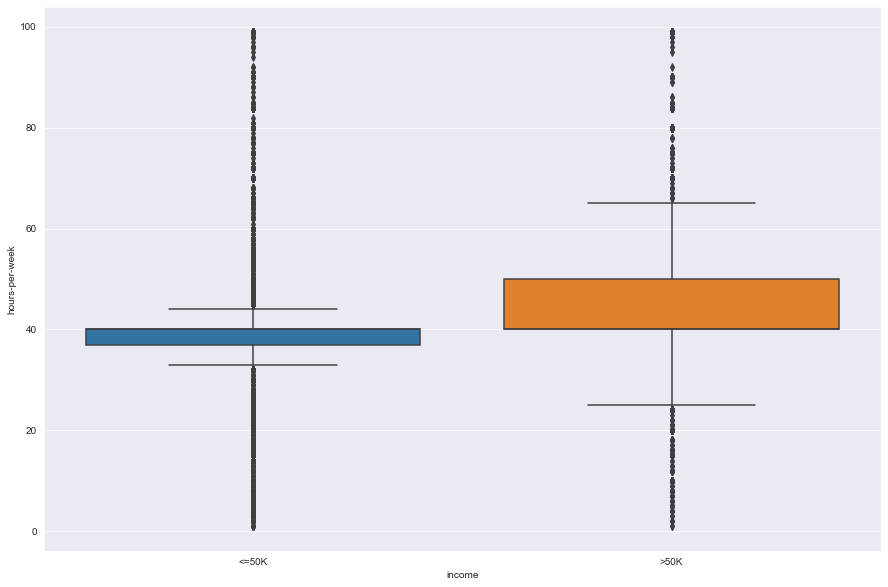

In [45]:
fig = plt.figure(figsize=(15,10)) 
sns.boxplot(x="income", y="hours-per-week", data=df)
plt.show()

We can conclude that there is difference in Mean of income group >50k and income group <=50k.
It means that hours-per-week has some contribution to the distinguish income groups.

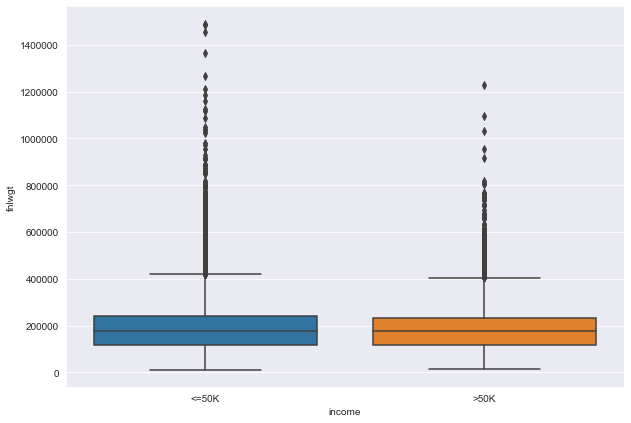

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()


We can conclude that there is no difference in Mean of income group >50k and income group <=50k.
It means that final weight has no contribution to the distinguish income group.

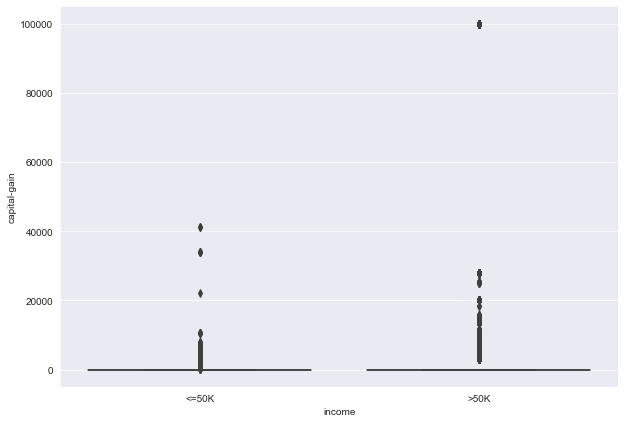

In [47]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()

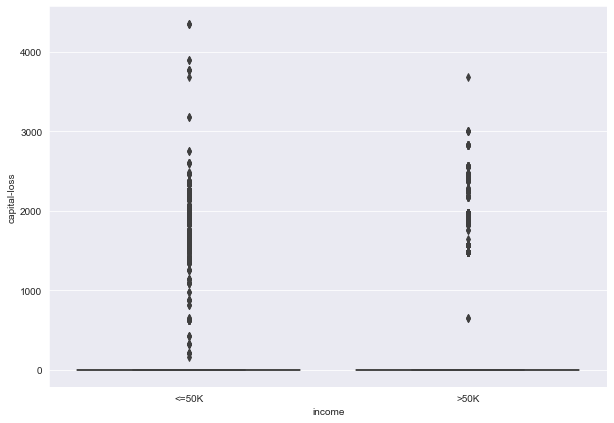

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()

# final conclusion

We can conclude that there is difference in income group >50k and income group <=50k.
it may be better to take the difference between capital-gain and capital-loss to create capital-change because it will yield more useful information

this data set is not balanced, it has more information from white married men living in the United States which means this data set could provide inaccurate results if the data is not facilitated properly. what this data does tell us however, is that many people prefer to work between 30 to 40 hours per week but those individuals who earn less than 50k a year tend to work less. finally, individuals who have a doctorate, prof-school, masters  degree are making more than 50K salary. we can conclude that higher education = higher salary.